In [62]:
#!/usr/bin/env python

import sys
import os
absFilePath = os.path.abspath('attractor_switching.py')
fileDir = os.path.dirname(absFilePath)
parentDir = os.path.dirname(fileDir)

# change working directory to the project file of codes, use parentDir else
sys.path.append(parentDir+'/src_and_example')

import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt
from pylab import figure, cm
import functions
import random
seed=50



In [73]:
def create_plot(data,ylabel,control_start,data2=None,insert_line=None):
    fs=30 #fontsize
    dt=0.1
    lw=1.5
    T=data.shape[0]*dt
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

    # set min and max for scope of y-axis
    minn=np.min(data)
    maxx=np.max(data)
    add=(maxx-minn)/25
    
    if data2 is None:
        im1=ax.plot(np.arange(0,int(T),dt),data)
    else:
        im1=ax.plot(np.arange(0,int(T),dt),data2,color='lightgray',linestyle='dotted')
        ax.plot(np.arange(0,int(T),dt),data)
    ax.set_xlabel('t',size=fs)
    ax.set_ylabel(ylabel,size=fs)
    ax.set_ylim(minn-add,maxx+add)
    #ax.set_title(title,size=fs, pad=20)
    ax.tick_params(labelsize=fs)
    ax.grid(True)
    ax.margins(0) # remove default margins (matplotlib verision 2+)
    ax.axvspan(control_start, 500, facecolor='green', alpha=0.09) #to indicate control time
    if insert_line==None:
        pass
    else:
        ax.plot(np.ones(90)*insert_line,np.arange(90)-45,color='black',linewidth=lw,linestyle='dashed')

    return fig.tight_layout()



Figure 4a


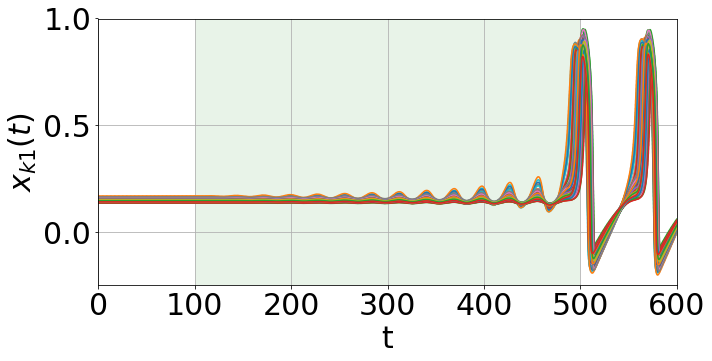

Figure 4c


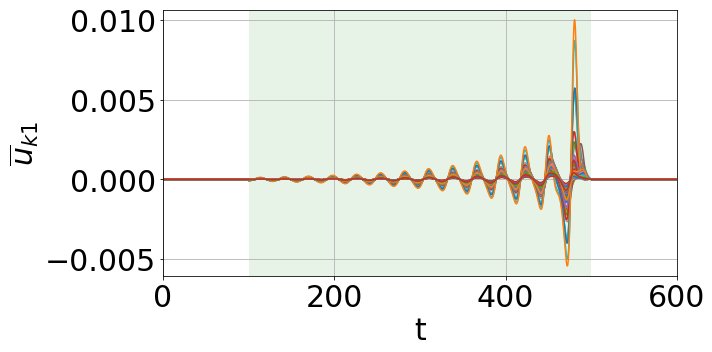

Figure 4b


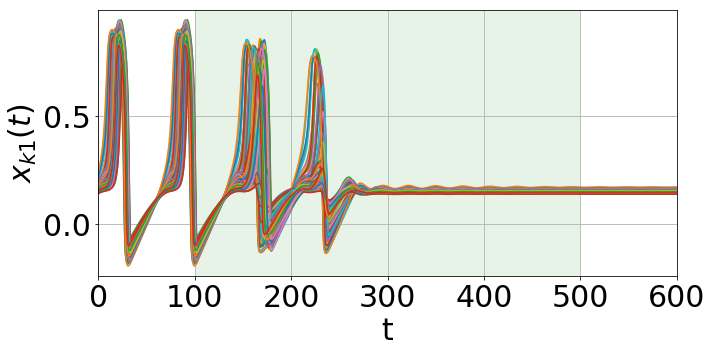

Figure 4d


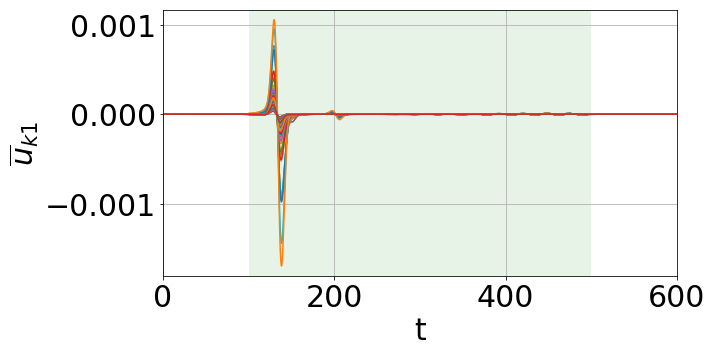

Figure 5a


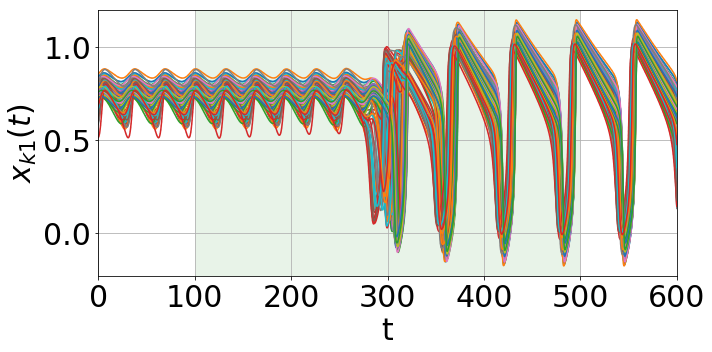

Figure 5c


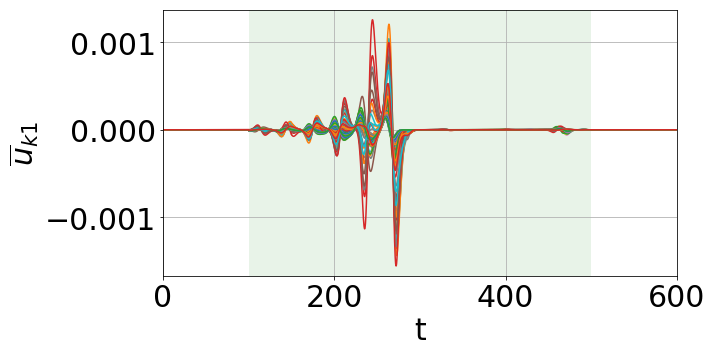

Figure 5b


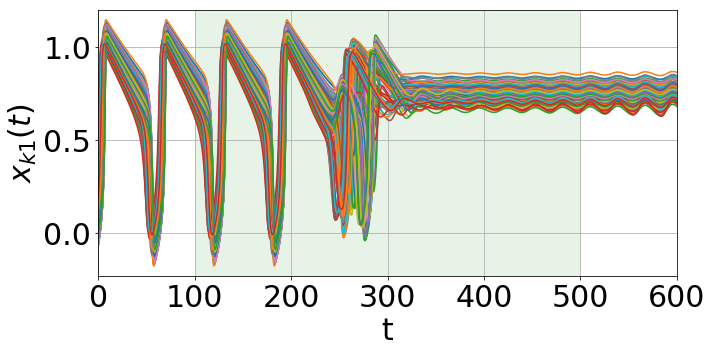

Figure 5d


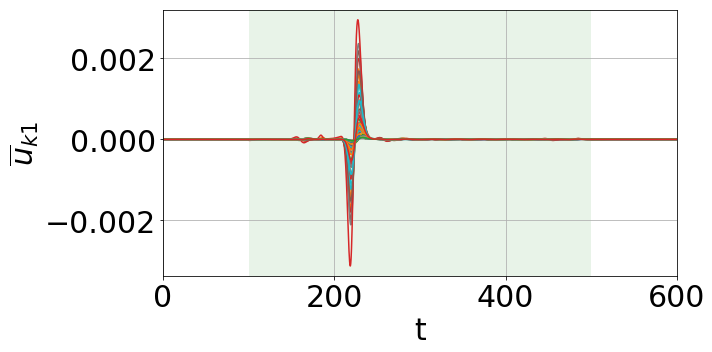

In [83]:
filename=fileDir+'/data/data_figure_4_5'
with open(filename, 'rb') as pickle_file:
    data = pickle.load(pickle_file)

node_ic=data['node_ic']
control=data['controls']
figures=['4a','4c','4b','4d','5a','5c','5b','5d']

goal='switch'
#Set dimensions
T= 600 #simulation and control time 
dt=0.1 #time stepsize
tsteps=int(T/dt) #number of timesteps
N=94
d=2 #dimension of each FitzHugh-Nagumo node
no_control=np.zeros((tsteps,N))
#make dictionary with all parameters
args = {
    'tsteps':tsteps,
    'dt':dt,
    'd':d,
    'noise':0
    }

bifurcation_ar=(['low','high'])
switchfromto_ar=(['SB','BS'])

figures=['4a','4c','4b','4d','5a','5c','5b','5d']
k=0
i=0
for b,bifurcation in enumerate(bifurcation_ar):
    for s,switchfromto in enumerate(switchfromto_ar):

        noise=0
        parameters = functions.set_parameters(goal,bifurcation,parentDir)
        args['node_ic']=node_ic[i]

        args.update(parameters)
        state_controlled=functions.plot_runge_kutta(functions.ODE_FHN_network,control[i], **args)
        state_uncontrolled=functions.plot_runge_kutta(functions.ODE_FHN_network,control[i], **args)

        print('Figure',figures[k])
        create_plot(state_controlled[:,0,:],'$x_{k1}(t)$',100,state_uncontrolled[:,0,:])
        plt.savefig(fileDir+'/figures/figure_'+figures[k]+'.png', bbox_inches='tight') 
        plt.show()
        k+=1
        print('Figure',figures[k])
        create_plot(control[i],'$\overline{u}_{k1}$',100)
        plt.savefig(fileDir+'/figures/figure_'+figures[k]+'.png', bbox_inches='tight') 
        plt.show()
        k+=1

        i+=1



Figure 7a


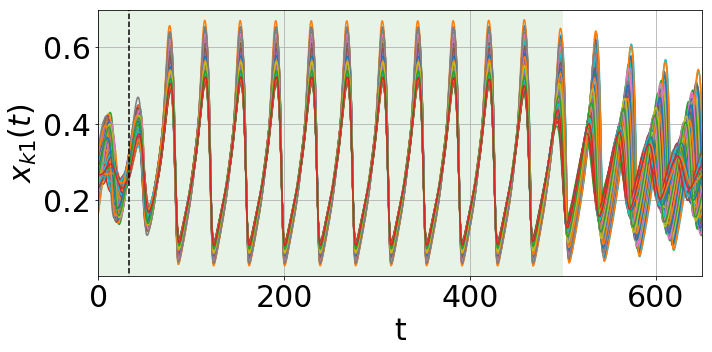

Figure 7c


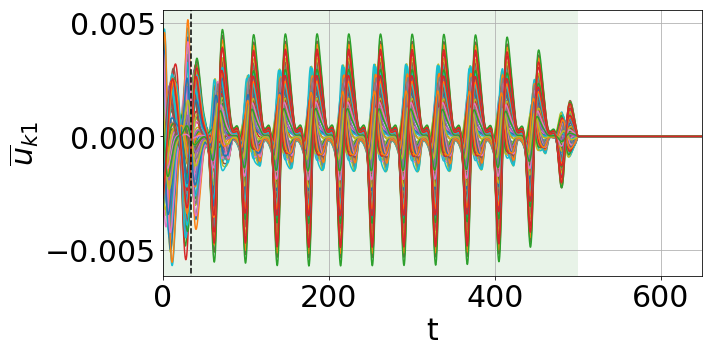

Figure 7b


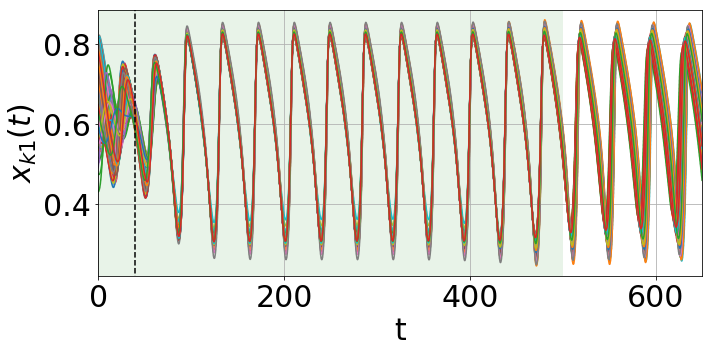

Figure 7d


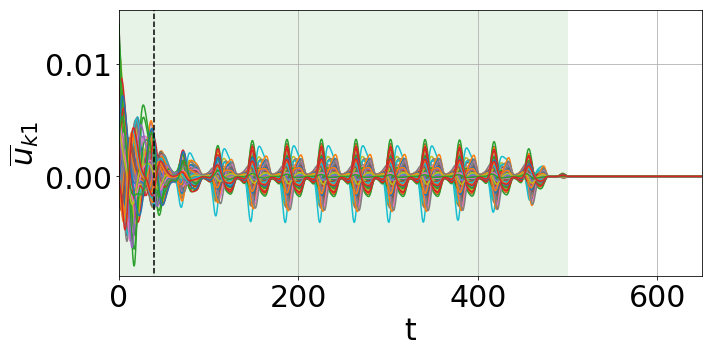

Figure 8a


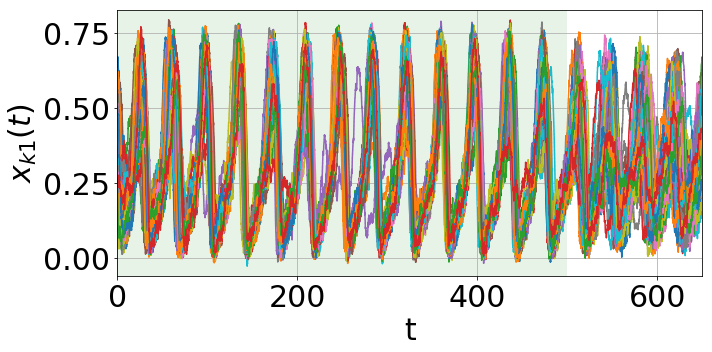

Figure 8c


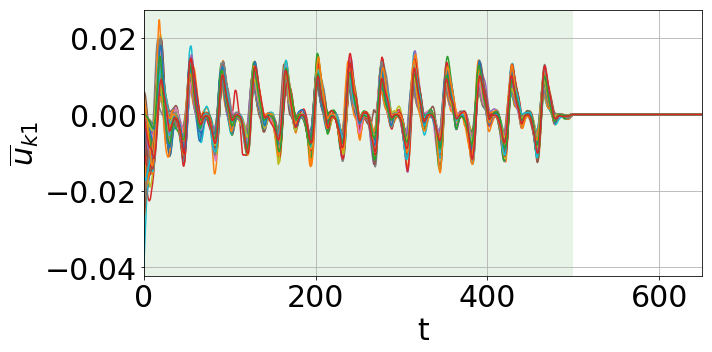

Figure 8b


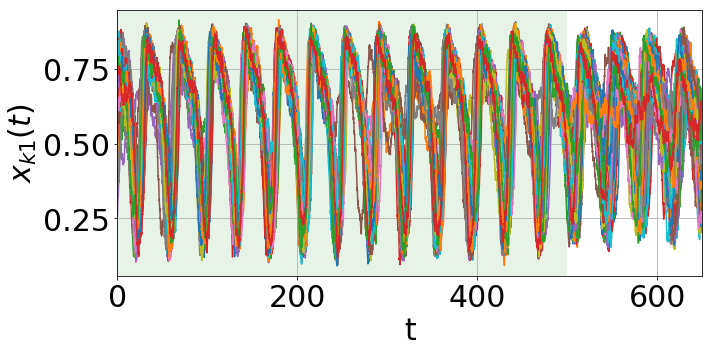

Figure 8d


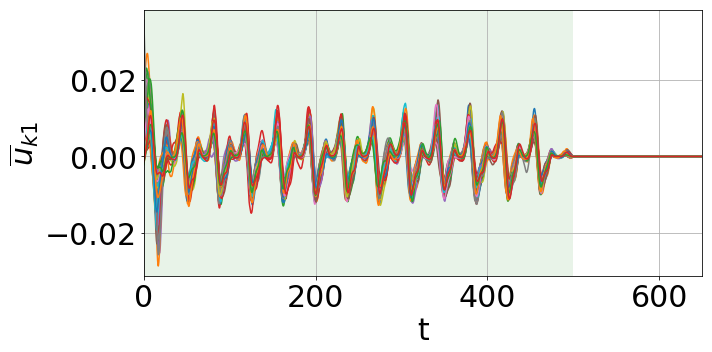

In [82]:
filename=fileDir+'/data/data_figure_7_8'
with open(filename, 'rb') as pickle_file:
    data = pickle.load(pickle_file)

node_ic=data['node_ic']
control=data['controls']
figures=['7a','7c','7b','7d','8a','8c','8b','8d']


goal='sync'
#Set dimensions
T= 650 #simulation and control time 
dt=0.1 #time stepsize
tsteps=int(T/dt) #number of timesteps
N=94
d=2 #dimension of each FitzHugh-Nagumo node
no_control=np.zeros((tsteps,N))
#make dictionary with all parameters
args = {
    'tsteps':tsteps,
    'dt':dt,
    'd':d,
    }

bifurcation_ar=(['low', 'high'])
eta_ar=np.array([0.0,0.024])
t_c=np.array([33.6,39.2,None,None])

k=0
i=0
for e,eta in enumerate(eta_ar):
    for b,bifurcation in enumerate(bifurcation_ar):

        noise=functions.initialize_noise(eta,dt,1,tsteps,parameters['N'])
        parameters = functions.set_parameters(goal,bifurcation,parentDir)
        args['node_ic']=node_ic[i]
        args['noise']=noise[0]

        args.update(parameters)
        state_controlled=functions.plot_runge_kutta(functions.ODE_FHN_network_noisy,control[i], **args)
        state_uncontrolled=functions.plot_runge_kutta(functions.ODE_FHN_network_noisy,control[i], **args)

        print('Figure',figures[k])
        create_plot(state_controlled[:,0,:],'$x_{k1}(t)$',0,data2=state_uncontrolled[:,0,:],insert_line=t_c[i])
        plt.savefig(fileDir+'/figures/figure_'+figures[k]+'.png', bbox_inches='tight') 
        plt.show()
        k+=1
        print('Figure',figures[k])
        create_plot(control[i],'$\overline{u}_{k1}$',0,insert_line=t_c[i])
        plt.savefig(fileDir+'/figures/figure_'+figures[k]+'.png', bbox_inches='tight') 
        plt.show()
        k+=1

        i+=1

